# An√°lise Final La Msion Brasil

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


## Carregando os dados

In [2]:
df_completo = pd.read_csv("df_completo_final.csv", sep=",")
df_completo.head(10)

Nome Atleta    sexo faixa_etaria           peso   ano  km_prova  \
0  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       1.0   
1  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       2.0   
2  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       3.0   
3  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       4.0   
4  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       5.0   
5  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       6.0   
6  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       7.0   
7  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       8.0   
8  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       9.0   
9  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023      10.0   

   tempo_por_km_seg  ano_mais_antigo  desnivel_positivo  desnivel_negativo  
0               285             2023               13.0               -9.0  
1               298             2023               88.0                0.0  
2               295             2023               58.0                0.0  
3               363             2023               46.0              -81.0  
4               357             2023               41.0              -58.0  
5               670             2023              128.0              -11.0  
6               258             2023              228.0               -7.0  
7               211             2023                1.0             -243.0  
8               338             2023                1.0             -122.0  
9               544             2023                9.0              -69.0

In [3]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nome Atleta        3894 non-null   object 
 1   sexo               3894 non-null   object 
 2   faixa_etaria       3894 non-null   object 
 3   peso               3894 non-null   object 
 4   ano                3894 non-null   int64  
 5   km_prova           3894 non-null   float64
 6   tempo_por_km_seg   3894 non-null   int64  
 7   ano_mais_antigo    3894 non-null   int64  
 8   desnivel_positivo  3881 non-null   float64
 9   desnivel_negativo  3881 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 304.3+ KB


## An√°lise Explorat√≥ria dos dados

Vamos come√ßar analisando o desempenho geral dos atletas. Para isso devemos trasnformar nosso dataframe onde cada linha √© um km do atleta, para um novo onde cada linha dever uma √∫nica observa√ß√£o do atleta e as vari√°veis v√£o ser um resumo.

In [4]:
df_agregado_por_atleta = (
    df_completo.groupby("Nome Atleta")
    .agg(
        # Pega a informa√ß√£o demogr√°fica (que √© a mesma em todas as linhas do atleta)
        sexo=("sexo", "first"),
        faixa_etaria=("faixa_etaria", "first"),
        peso=("peso", "first"),
        ano_corrida=("ano", "first"),  # Pega o ano da corrida
        # Calcula as m√©tricas de desempenho e estrat√©gia
        Tempo_Final_seg=("tempo_por_km_seg", "sum"),
        Ritmo_Medio_seg=("tempo_por_km_seg", "mean"),
        Variabilidade_Ritmo_std=(
            "tempo_por_km_seg",
            "std",
        ),  # Desvio padr√£o do ritmo por km
        # Calcula as m√©tricas de esfor√ßo relacionadas ao percurso
        Total_Desnivel_Positivo=("desnivel_positivo", "sum"),
        Total_Desnivel_negativo=("desnivel_negativo", "sum"),
    )
    .reset_index()
)

# Para facilitar a interpreta√ß√£o, vamos converter segundos para minutos
df_agregado_por_atleta["Tempo_Final_min"] = (
    df_agregado_por_atleta["Tempo_Final_seg"] / 60
)
df_agregado_por_atleta["Ritmo_Medio_min"] = (
    df_agregado_por_atleta["Ritmo_Medio_seg"] / 60
)
df_agregado_por_atleta["Variabilidade_Ritmo_min_std"] = (
    df_agregado_por_atleta["Variabilidade_Ritmo_std"] / 60
)

# Vamos ver como ficou
df_agregado_por_atleta.head()

Nome Atleta    sexo faixa_etaria        peso  ano_corrida  \
0       ALFREDO GUIMARAES  Homens      45 a 54  75 a 84 kg         2022   
1             Albert Melo  Homens      25 a 34  75 a 84 kg         2022   
2  Alessandro Sousa(all√™)  Homens      45 a 54  65 a 74 kg         2023   
3          Alex Junior Aj  Homens      20 a 24  65 a 74 kg         2022   
4      Alexandre Santiago  Homens      35 a 44  55 a 64 kg         2022   

   Tempo_Final_seg  Ritmo_Medio_seg  Variabilidade_Ritmo_std  \
0            21774       604.833333               290.291331   
1            31986       888.500000               417.596832   
2            33826       939.611111               669.719569   
3            18496       513.777778               261.647539   
4            14894       413.722222               194.192778   

   Total_Desnivel_Positivo  Total_Desnivel_negativo  Tempo_Final_min  \
0                   2787.0                  -2790.0       362.900000   
1                   2787.0                  -2790.0       533.100000   
2                   2787.0                  -2790.0       563.766667   
3                   2787.0                  -2790.0       308.266667   
4                   2779.0                  -2781.0       248.233333   

   Ritmo_Medio_min  Variabilidade_Ritmo_min_std  
0        10.080556                     4.838189  
1        14.808333                     6.959947  
2        15.660185                    11.161993  
3         8.562963                     4.360792  
4         6.895370                     3.236546

### An√°lises gr√°ficas

#### Dstribui√ß√£o do tempo final

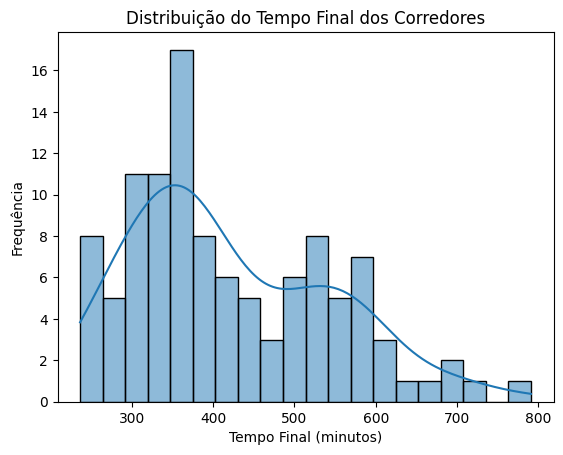

count    109.000000
mean     422.824771
std      123.184123
min      236.400000
25%      329.000000
50%      389.816667
75%      525.333333
max      790.933333
Name: Tempo_Final_min, dtype: float64


In [5]:
sns.histplot(data=df_agregado_por_atleta, x="Tempo_Final_min", bins=20, kde=True)
plt.title("Distribui√ß√£o do Tempo Final dos Corredores")
plt.xlabel("Tempo Final (minutos)")
plt.ylabel("Frequ√™ncia")
plt.show()

# Tamb√©m √© √∫til ver as estat√≠sticas descritivas
print(df_agregado_por_atleta["Tempo_Final_min"].describe())

#### An√°lise do Sexo

In [6]:
df_agregado_por_atleta["sexo"].value_counts()

sexo
Homens      78
Mulheres    31
Name: count, dtype: int64

- Aqui podemos observar a que a quantidade de participantes homens √© maior que a participa√ß√£o de mulheres.

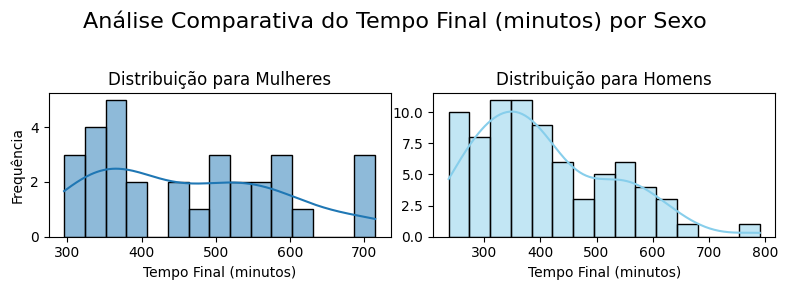

--- Estat√≠sticas Descritivas Comparativas ---
       Mulheres  Homens
count     31.00   78.00
mean     465.33  405.93
std      124.03  119.47
min      295.48  236.40
25%      361.98  314.38
50%      444.90  374.14
75%      557.38  497.89
max      714.43  790.93


In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# T√≠tulo principal para a figura inteira
fig.suptitle("An√°lise Comparativa do Tempo Final (minutos) por Sexo", fontsize=16)


# 2. Plote o histograma das Mulheres no primeiro eixo (axes[0])
sns.histplot(
    data=df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Mulheres"],
    x="Tempo_Final_min",
    bins=15,
    kde=True,
    ax=axes[0],
)  # A chave √© especificar o eixo aqui!
axes[0].set_title("Distribui√ß√£o para Mulheres")
axes[0].set_xlabel("Tempo Final (minutos)")
axes[0].set_ylabel("Frequ√™ncia")


# 3. Plote o histograma dos Homens no segundo eixo (axes[1])
sns.histplot(
    data=df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Homens"],
    x="Tempo_Final_min",
    bins=15,
    kde=True,
    color="skyblue",  # Mudar a cor ajuda na diferencia√ß√£o
    ax=axes[1],
)  # E aqui tamb√©m!
axes[1].set_title("Distribui√ß√£o para Homens")
axes[1].set_xlabel("Tempo Final (minutos)")
axes[1].set_ylabel("")  # Pode remover o label do eixo Y para um visual mais limpo


# 4. Exiba os gr√°ficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()


# ======================================================================
# PARTE 2: ESTAT√çSTICAS (.DESCRIBE()) LADO A LADO
# ======================================================================

# 1. Calcule o describe() para cada grupo separadamente
desc_mulheres = df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Mulheres"][
    "Tempo_Final_min"
].describe()
desc_homens = df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Homens"][
    "Tempo_Final_min"
].describe()


# 2. Use pd.concat para unir as duas sa√≠das como colunas de um novo DataFrame
# axis=1 indica que a concatena√ß√£o deve ser feita pelas colunas (lado a lado).
# keys=[] define os nomes das novas colunas.
estatisticas_comparativas = pd.concat(
    [desc_mulheres, desc_homens], axis=1, keys=["Mulheres", "Homens"]
)


# 3. Imprima a tabela comparativa final
print("--- Estat√≠sticas Descritivas Comparativas ---")
print(
    estatisticas_comparativas.round(2)
)  # .round(2) para formatar com 2 casas decimais


In [8]:
estatisticas_describe = ["count", "mean", "std", "min", "median", "max"]

# 2. Crie o dicion√°rio de agrega√ß√£o, passando a lista de estat√≠sticas para cada coluna
resumo_completo = (
    df_agregado_por_atleta.groupby("sexo")
    .agg(
        {
            "Tempo_Final_min": estatisticas_describe,
            "Ritmo_Medio_min": estatisticas_describe,
            "Variabilidade_Ritmo_min_std": estatisticas_describe,
        }
    )
    .stack(level=0)
)

# 3. Imprima o resultado. Usar .round(2) ajuda na visualiza√ß√£o.
print("--- Resumo Estat√≠stico Detalhado por Sexo ---")
print(resumo_completo.round(2))

--- Resumo Estat√≠stico Detalhado por Sexo ---
                                      count    mean     std     min  median  \
sexo                                                                          
Homens   Ritmo_Medio_min                 78   11.36    3.38    6.57   10.39   
         Tempo_Final_min                 78  405.93  119.47  236.40  374.14   
         Variabilidade_Ritmo_min_std     78    6.63    3.08    2.90    5.13   
Mulheres Ritmo_Medio_min                 31   13.07    3.56    8.21   12.36   
         Tempo_Final_min                 31  465.33  124.03  295.48  444.90   
         Variabilidade_Ritmo_min_std     31    7.98    3.55    3.90    7.11   

                                         max  
sexo                                          
Homens   Ritmo_Medio_min               22.60  
         Tempo_Final_min              790.93  
         Variabilidade_Ritmo_min_std   16.40  
Mulheres Ritmo_Medio_min               20.41  
         Tempo_Final_min              

C:\Users\Home\AppData\Local\Temp\ipykernel_9928\3671722932.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=0)


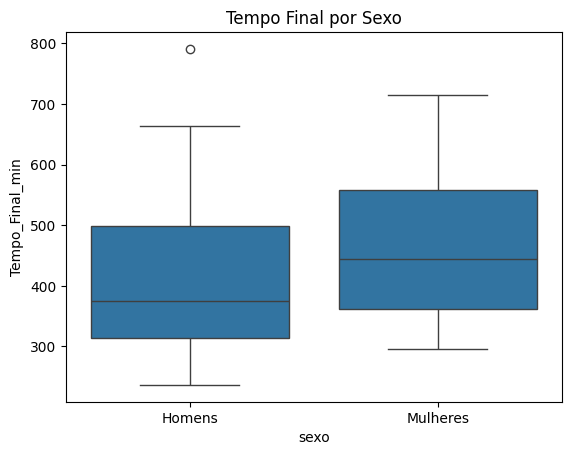

In [9]:
# Sexo vs. Tempo Final
sns.boxplot(data=df_agregado_por_atleta, x="sexo", y="Tempo_Final_min")
plt.title("Tempo Final por Sexo")
plt.show()


1. Tempo Final da Prova (Tempo_Final_min)

Desempenho M√©dio: Os homens terminaram a prova, em m√©dia, cerca de 1 hora mais r√°pido que as mulheres (mean de 406 min para homens vs. 465 min para mulheres). A mediana (o valor do meio) confirma essa tend√™ncia, mostrando que o corredor "mediano" masculino tamb√©m foi consideravelmente mais r√°pido.

Dispers√£o: A dispers√£o dos tempos √© alta e relativamente parecida para ambos os grupos (std de 119 min para homens e 124 min para mulheres). Isso indica que, em ambos os sexos, havia uma grande variedade de n√≠veis de habilidade, desde os corredores mais r√°pidos at√© os que levaram mais tempo. Podendo existir n√≠veis entre os corredores, indo de corredores mais experientes e profissionais ate corredores amadores e menos experientes.

2. Ritmo M√©dio (Ritmo_Medio_min)

Velocidade M√©dia: Confirmando o dado anterior, o ritmo m√©dio dos homens foi mais baixo (mais r√°pido), com uma m√©dia de 11.36 min/km contra 13.07 min/km das mulheres.

Melhores e Piores Ritmos: O homem mais r√°pido teve um ritmo de 6.57 min/km, enquanto a mulher mais r√°pida teve um ritmo de 8.21 min/km. Ambos os grupos tiveram atletas com ritmos bem mais lentos (22.60 e 20.41 min/km), o que √© comum em corridas de montanha devido √† dificuldade do percurso.

3. Variabilidade do Ritmo (Variabilidade_Ritmo_min_std)

Consist√™ncia da Prova: Esta √© talvez a m√©trica mais interessante. Em m√©dia, os homens tiveram uma menor variabilidade de ritmo (mean de 6.63) em compara√ß√£o com as mulheres (mean de 7.98).

#### An√°lise por Faixa et√°ria

In [19]:
df_agregado_por_atleta["faixa_etaria"].value_counts() / len(df_agregado_por_atleta)

faixa_etaria
35 a 44    0.412844
25 a 34    0.311927
45 a 54    0.183486
20 a 24    0.055046
55 a 64    0.036697
Name: count, dtype: float64

- Aqui podemos notar uma grande concetra√ß√£o em corredores de 35 a 44 anos, seguindo de corredores mais jovens de 25 a 34 anos. Temos um acumo de 90% dos participantes indo de 25 a 55 anos.

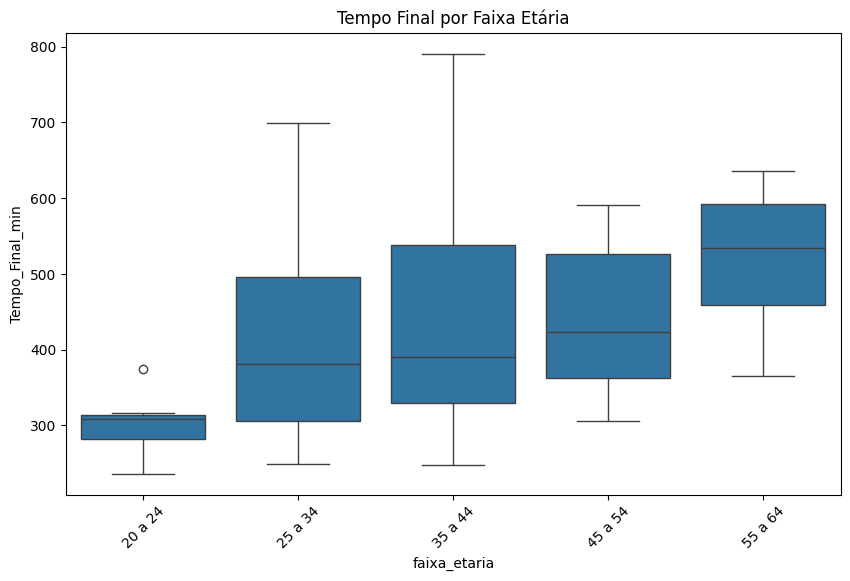

In [11]:
# Faixa Et√°ria vs. Tempo Final
plt.figure(figsize=(10, 6))  # Aumenta o tamanho da figura para caber as labels
# Remove None values before sorting to avoid TypeError
faixa_etaria_order = sorted(
    [x for x in df_agregado_por_atleta["faixa_etaria"].unique() if x is not None]
)
sns.boxplot(
    data=df_agregado_por_atleta,
    x="faixa_etaria",
    y="Tempo_Final_min",
    order=faixa_etaria_order,
)
plt.title("Tempo Final por Faixa Et√°ria")
plt.xticks(rotation=45)  # Rotaciona as labels do eixo x para n√£o sobrepor
plt.show()

- Tend√™ncia Geral: O gr√°fico evidencia uma tend√™ncia geral de aumento do tempo mediano de conclus√£o da prova com o avan√ßo da idade. Contudo, essa rela√ß√£o n√£o se mostra perfeitamente linear.

- Melhor Desempenho: A faixa et√°ria de 20 a 24 anos se destaca com o menor tempo mediano e a menor dispers√£o (caixa mais compacta). Isso sugere que este grupo n√£o s√≥ foi o mais r√°pido, em m√©dia, mas tamb√©m o mais homog√™neo em termos de performance.

- Maior Variabilidade: O grupo de 35 a 44 anos apresenta a maior amplitude interquartil (a "altura" da caixa), indicando a maior variabilidade nos tempos de conclus√£o. Isso pode sugerir que esta faixa cont√©m uma mistura mais heterog√™nea de atletas, desde os muito experientes at√© os iniciantes.

- Ponto de Inflex√£o: Nota-se um ponto de interesse na faixa de 45 a 54 anos, que apresenta um tempo mediano ligeiramente inferior ao do grupo anterior (35 a 44 anos). Isso quebra a tend√™ncia de queda de performance e pode ser um ponto a ser investigado futuramente.

- Outlier: √â importante destacar a presen√ßa de um outlier no grupo de 20 a 24 anos, indicando um atleta com um tempo de prova atipicamente superior ao de seus pares na mesma faixa et√°ria.

#### An√°lise por faixa de peso

In [12]:
df_agregado_por_atleta["peso"].value_counts()

peso
65 a 74 kg        34
75 a 84 kg        25
55 a 64 kg        21
54 kg e abaixo    12
N√£o informado      8
85 a 94 kg         7
95 kg a 104 kg     2
Name: count, dtype: int64

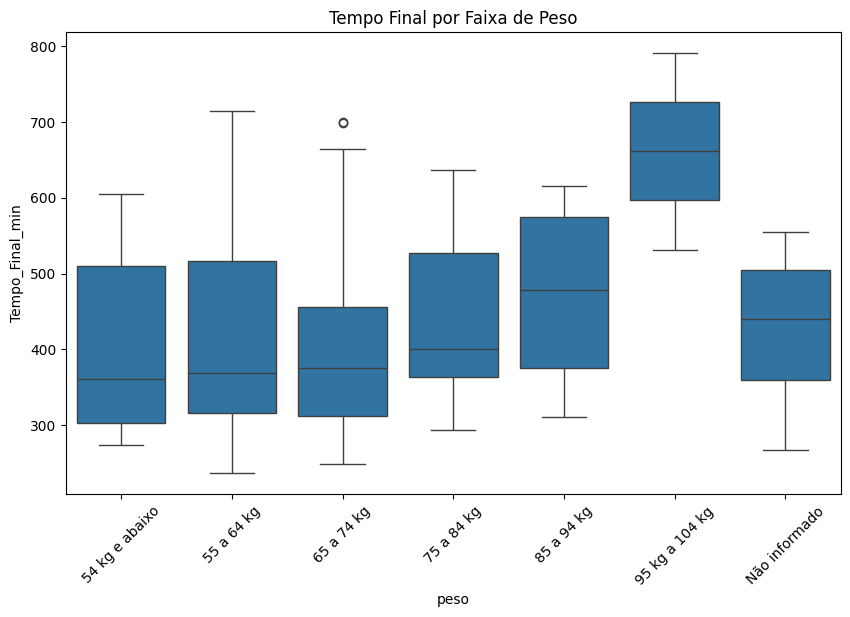

In [13]:
# Peso vs. Tempo Final
plt.figure(figsize=(10, 6))
# Remove None values before sorting to avoid TypeError
peso_order = sorted(
    [x for x in df_agregado_por_atleta["peso"].unique() if x is not None]
)
sns.boxplot(
    data=df_agregado_por_atleta, x="peso", y="Tempo_Final_min", order=peso_order
)
plt.title("Tempo Final por Faixa de Peso")
plt.xticks(rotation=45)
plt.show()

- Tend√™ncia Principal: Fica clara a correla√ß√£o entre o aumento da faixa de peso e o aumento no tempo mediano de prova. Atletas mais leves tenderam a ser mais r√°pidos.

- Desempenho nos Extremos: O grupo de 54 kg e abaixo obteve os melhores tempos, enquanto a faixa de 95 a 104 kg registrou o desempenho m√©dio mais lento.

- Variabilidade: As faixas de peso intermedi√°rias (55 a 74 kg) mostram a maior dispers√£o nos resultado, indicando uma grande varia√ß√£o de performance nesses grupos.

- Dados n√£o informados: O grupo "N√£o informado" apresenta um desempenho mediano, posicionando-se de forma similar √†s categorias de peso intermedi√°rias.

#### An√°lise da Variabilidade de Ritmo

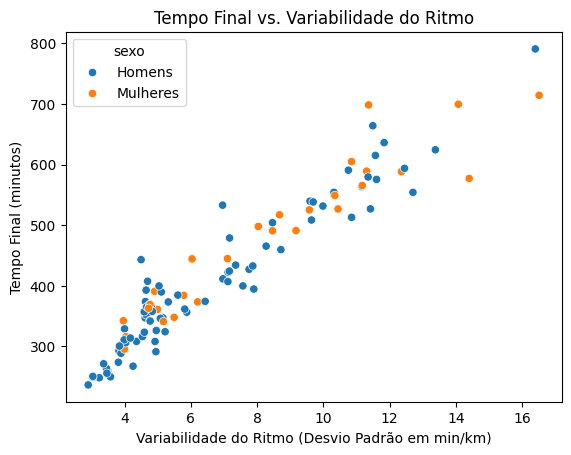

In [14]:
sns.scatterplot(
    data=df_agregado_por_atleta,
    x="Variabilidade_Ritmo_min_std",
    y="Tempo_Final_min",
    hue="sexo",
)
plt.title("Tempo Final vs. Variabilidade do Ritmo")
plt.xlabel("Variabilidade do Ritmo (Desvio Padr√£o em min/km)")
plt.ylabel("Tempo Final (minutos)")
plt.show()

- Correla√ß√£o Positiva Evidente: O gr√°fico mostra uma clara e forte correla√ß√£o positiva entre as duas vari√°veis. Isso significa que, √† medida que a variabilidade do ritmo aumenta (eixo X), o tempo final da prova tamb√©m tende a aumentar (eixo Y).

- Interpreta√ß√£o Pr√°tica: Em termos simples, os atletas que mantiveram um ritmo mais constante e com menos oscila√ß√µes foram, em geral, os que terminaram a prova mais r√°pido. A consist√™ncia no ritmo parece ser um indicador chave para um bom desempenho.

- Comparativo entre Sexos: Ambos os grupos, homens e mulheres, seguem a mesma tend√™ncia linear. N√£o h√° uma separa√ß√£o clara dos grupos, indicando que essa rela√ß√£o entre consist√™ncia e performance √© v√°lida para ambos. No entanto, √© poss√≠vel notar que os pontos com o melhor desempenho combinado (canto inferior esquerdo, com baixo tempo e baixa variabilidade) s√£o, em sua maioria, de atletas masculinos.

- Conclus√£o: A consist√™ncia do ritmo √© um fator crucial para o desempenho nesta prova. Atletas menos eficientes em manter um passo est√°vel, provavelmente devido ao terreno ou √† estrat√©gia, acabaram com tempos de conclus√£o significativamente mais altos.

#### An√°lise Metade da Prova

Vamos analisar o tempo m√©dio entre primeira metade e segunda metade da prova.

- (Split Positivo): Significa que o ritmo na segunda metade foi mais alto (mais lento)
- (Split Negativo): Seria o caso de um atleta que correu a segunda metade mais r√°pido que a primeira.

In [22]:
df_metade = df_completo.copy()
df_metade["Metade_Prova"] = "Primeira Metade"
df_metade.loc[df_metade["km_prova"] > 18.0, "Metade_Prova"] = "Segunda Metade"
df_metade.head(5)

Nome Atleta    sexo faixa_etaria           peso   ano  km_prova  \
0  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       1.0   
1  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       2.0   
2  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       3.0   
3  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       4.0   
4  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       5.0   

   tempo_por_km_seg  ano_mais_antigo  desnivel_positivo  desnivel_negativo  \
0               285             2023               13.0               -9.0   
1               298             2023               88.0                0.0   
2               295             2023               58.0                0.0   
3               363             2023               46.0              -81.0   
4               357             2023               41.0              -58.0   

      Metade_Prova  
0  Primeira Metade  
1  Primeira Metade  
2  Primeira Metade  
3  Primeira Metade  
4  Primeira Metade

In [ ]:
ritmo_por_metade = df_metade.groupby(["Nome Atleta", "Metade_Prova"]).agg(
    tempo_por_km_seg=("tempo_por_km_seg", "mean"),
    tempo_total=("tempo_por_km_seg", "sum"),
)
comparativo_splits = ritmo_por_metade.unstack()
multi_level_columns = comparativo_splits.columns
novos_nomes_colunas = [
    f"Ritmo_Medio_{metade.replace(' ', '_')}"
    if metrica == "tempo_por_km_seg"
    else f"Tempo_Total_{metade.replace(' ', '_')}"
    for metrica, metade in multi_level_columns
]

# 3. Atribua os novos nomes ao seu DataFrame
comparativo_splits_flat = comparativo_splits.copy()  # Copia para n√£o alterar o original
comparativo_splits_flat.columns = novos_nomes_colunas

colunas_em_segundos = [
    "Ritmo_Medio_Primeira_Metade",
    "Ritmo_Medio_Segunda_Metade",
    "Tempo_Total_Primeira_Metade",
    "Tempo_Total_Segunda_Metade",
]
for coluna in colunas_em_segundos:
    # 3. Defina o nome da nova coluna, adicionando '_min' ao final
    nova_coluna_min = coluna + "_min"

    # 4. Crie a nova coluna, fazendo a convers√£o (dividir por 60) e arredondando (round(2))
    comparativo_splits_flat[nova_coluna_min] = (
        comparativo_splits_flat[coluna] / 60
    ).round(2)


comparativo_splits_flat["Diferenca_Media_Seg_Menos_Pri"] = (
    comparativo_splits_flat["Ritmo_Medio_Segunda_Metade_min"]
    - comparativo_splits_flat["Ritmo_Medio_Primeira_Metade_min"]
).round(2)
comparativo_splits_flat["Diferenca_total_Seg_Menos_Pri"] = (
    comparativo_splits_flat["Tempo_Total_Segunda_Metade_min"]
    - comparativo_splits_flat["Tempo_Total_Primeira_Metade_min"]
).round(2)
comparativo_splits_flat.head(5)

Ritmo_Medio_Primeira_Metade  \
Nome Atleta                                                
ALFREDO GUIMARAES                             667.777778   
Albert Melo                                   942.944444   
Alessandro Sousa(all√™)                        945.388889   
Alex Junior Aj                                598.944444   
Alexandre Santiago                            457.210526   
Alexandre Zolio                               997.388889   
Anamaria Bacci                               1120.277778   
Andr√© Mapa                                    493.444444   
Arnaldo Junio Rocha Pinho                     539.833333   
Arnaldo üáßüá∑ Lamounier Junior                   743.000000   

                             Ritmo_Medio_Segunda_Metade  \
Nome Atleta                                               
ALFREDO GUIMARAES                            541.888889   
Albert Melo                                  834.055556   
Alessandro Sousa(all√™)                       933.833333   
Alex Junior Aj                               428.611111   
Alexandre Santiago                           365.117647   
Alexandre Zolio                              850.000000   
Anamaria Bacci                               890.647059   
Andr√© Mapa                                   421.058824   
Arnaldo Junio Rocha Pinho                    436.222222   
Arnaldo üáßüá∑ Lamounier Junior                  702.000000   

                             Tempo_Total_Primeira_Metade  \
Nome Atleta                                                
ALFREDO GUIMARAES                                  12020   
Albert Melo                                        16973   
Alessandro Sousa(all√™)                             17017   
Alex Junior Aj                                     10781   
Alexandre Santiago                                  8687   
Alexandre Zolio                                    17953   
Anamaria Bacci                                     20165   
Andr√© Mapa                                          8882   
Arnaldo Junio Rocha Pinho                           9717   
Arnaldo üáßüá∑ Lamounier Junior                        14117   

                             Tempo_Total_Segunda_Metade  \
Nome Atleta                                               
ALFREDO GUIMARAES                                  9754   
Albert Melo                                       15013   
Alessandro Sousa(all√™)                            16809   
Alex Junior Aj                                     7715   
Alexandre Santiago                                 6207   
Alexandre Zolio                                   15300   
Anamaria Bacci                                    15141   
Andr√© Mapa                                         7158   
Arnaldo Junio Rocha Pinho                          7852   
Arnaldo üáßüá∑ Lamounier Junior                       11232   

                             Ritmo_Medio_Primeira_Metade_min  \
Nome Atleta                                                    
ALFREDO GUIMARAES                                      11.13   
Albert Melo                                            15.72   
Alessandro Sousa(all√™)                                 15.76   
Alex Junior Aj                                          9.98   
Alexandre Santiago                                      7.62   
Alexandre Zolio                                        16.62   
Anamaria Bacci                                         18.67   
Andr√© Mapa                                              8.22   
Arnaldo Junio Rocha Pinho                               9.00   
Arnaldo üáßüá∑ Lamounier Junior                            12.38   

                             Ritmo_Medio_Segunda_Metade_min  \
Nome Atleta                                                   
ALFREDO GUIMARAES                                      9.03   
Albert Melo                                           13.90   
Alessandro Sousa(all√™)                                15.56   
Alex Junior Aj                              

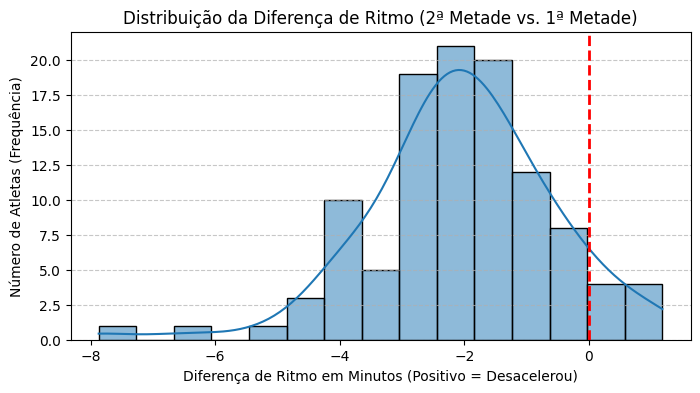

In [51]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=comparativo_splits_flat, x="Diferenca_Media_Seg_Menos_Pri", kde=True, bins=15
)

# Adiciona uma linha vertical em x=0 para ser nossa refer√™ncia
# √Ä esquerda da linha: atletas que aceleraram (split negativo)
# √Ä direita da linha: atletas que desaceleraram (split positivo)
plt.axvline(x=0, color="red", linestyle="--", linewidth=2)

plt.title("Distribui√ß√£o da Diferen√ßa de Ritmo (2¬™ Metade vs. 1¬™ Metade)")
plt.xlabel("Diferen√ßa de Ritmo em Minutos (Positivo = Desacelerou)")
plt.ylabel("N√∫mero de Atletas (Frequ√™ncia)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

A an√°lise da distribui√ß√£o da diferen√ßa de ritmo entre a primeira e a segunda metade da prova (gr√°fico de histograma) revelou um insight fundamental sobre a natureza da competi√ß√£o. Observou-se que a grande maioria dos atletas concluintes apresentou um "split negativo", ou seja, um ritmo m√©dio mais r√°pido na segunda metade do percurso.

Este padr√£o, evidenciado pelo pico da distribui√ß√£o em valores negativos (-2 a -3 min/km), n√£o deve ser interpretado primariamente como uma escolha estrat√©gica deliberada dos atletas. A causa raiz mais prov√°vel √© o perfil altim√©trico do percurso, com uma concentra√ß√£o de subidas e maior dificuldade na primeira metade.

Dessa forma, a vari√°vel Diferenca_Seg_Menos_Pri transcende a simples no√ß√£o de estrat√©gia e se torna um √≠ndice de gest√£o de prova e de efici√™ncia do atleta. Ela quantifica a capacidade de cada indiv√≠duo de administrar seu esfor√ßo na se√ß√£o mais exigente para, ent√£o, capitalizar no trecho teoricamente mais favor√°vel. Uma diferen√ßa mais negativa pode indicar uma gest√£o de energia superior. Portanto, esta vari√°vel √© considerada relevante e ser√° incorporada em an√°lises subsequentes para investigar sua correla√ß√£o com o desempenho geral e outras m√©tricas dos atletas.

In [52]:
# Vamos unir as duas tabelas
df_final_completo = pd.merge(
    left=df_agregado_por_atleta,  # A tabela principal, da esquerda
    right=comparativo_splits_flat,  # A tabela com os splits, da direita
    left_on="Nome Atleta",  # A chave na tabela da esquerda √© a COLUNA 'Nome Atleta'
    right_index=True,  # A chave na tabela da direita √© o √çNDICE (que tamb√©m √© o nome do atleta)
    how="left",  # 'how=left' garante que todos os atletas da tabela principal sejam mantidos
)

df_final_completo.head()

Nome Atleta    sexo faixa_etaria        peso  ano_corrida  \
0       ALFREDO GUIMARAES  Homens      45 a 54  75 a 84 kg         2022   
1             Albert Melo  Homens      25 a 34  75 a 84 kg         2022   
2  Alessandro Sousa(all√™)  Homens      45 a 54  65 a 74 kg         2023   
3          Alex Junior Aj  Homens      20 a 24  65 a 74 kg         2022   
4      Alexandre Santiago  Homens      35 a 44  55 a 64 kg         2022   

   Tempo_Final_seg  Ritmo_Medio_seg  Variabilidade_Ritmo_std  \
0            21774       604.833333               290.291331   
1            31986       888.500000               417.596832   
2            33826       939.611111               669.719569   
3            18496       513.777778               261.647539   
4            14894       413.722222               194.192778   

   Total_Desnivel_Positivo  Total_Desnivel_negativo  ...  \
0                   2787.0                  -2790.0  ...   
1                   2787.0                  -2790.0  ...   
2                   2787.0                  -2790.0  ...   
3                   2787.0                  -2790.0  ...   
4                   2779.0                  -2781.0  ...   

   Ritmo_Medio_Primeira_Metade  Ritmo_Medio_Segunda_Metade  \
0                   667.777778                  541.888889   
1                   942.944444                  834.055556   
2                   945.388889                  933.833333   
3                   598.944444                  428.611111   
4                   457.210526                  365.117647   

   Tempo_Total_Primeira_Metade  Tempo_Total_Segunda_Metade  \
0                        12020                        9754   
1                        16973                       15013   
2                        17017                       16809   
3                        10781                        7715   
4                         8687                        6207   

   Ritmo_Medio_Primeira_Metade_min  Ritmo_Medio_Segunda_Metade_min  \
0                            11.13                            9.03   
1                            15.72                           13.90   
2                            15.76                           15.56   
3                             9.98                            7.14   
4                             7.62                            6.09   

   Tempo_Total_Primeira_Metade_min  Tempo_Total_Segunda_Metade_min  \
0                           200.33                          162.57   
1                           282.88                          250.22   
2                           283.62                          280.15   
3                           179.68                          128.58   
4                           144.78                          103.45   

   Diferenca_Media_Seg_Menos_Pri  Diferenca_total_Seg_Menos_Pri  
0                          -2.10                         -37.76  
1                          -1.82                         -32.66  
2                          -0.20                          -3.47  
3                          -2.84                         -51.10  
4                          -1.53                         -41.33  

[5 rows x 23 columns]

In [58]:
df_final_completo.to_csv("df_agregado_por_atleta.csv", sep=";")

##### Analise tempo de prova x Diferen√ßa entre primeira e segunda parte da prova.

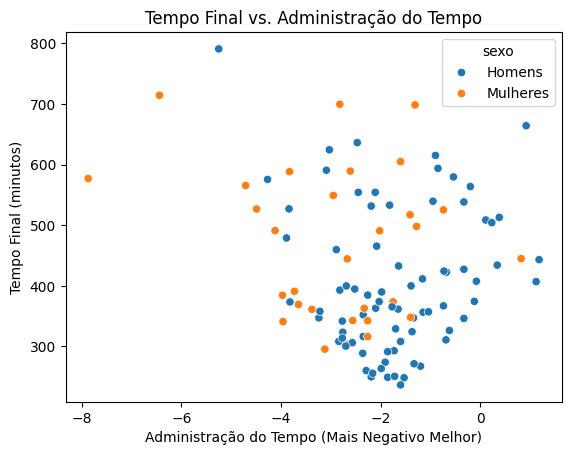

In [53]:
sns.scatterplot(
    data=df_final_completo,
    x="Diferenca_Media_Seg_Menos_Pri",
    y="Tempo_Final_min",
    hue="sexo",
)
plt.title("Tempo Final vs. Administra√ß√£o do Tempo")
plt.xlabel("Administra√ß√£o do Tempo (Mais Negativo Melhor)")
plt.ylabel("Tempo Final (minutos)")
plt.show()

A vari√°vel "Administra√ß√£o do Tempo" n√£o tem uma correla√ß√£o linear simples com o tempo final, mas ela atua como um fator qualificador ou limitante para o alto desempenho.

- Necess√°rio, mas n√£o Suficiente: Para conseguir um tempo final de elite nesta prova, √© necess√°rio que o atleta execute a prova dentro de uma faixa √≥tima de gest√£o de ritmo (neste caso, entre -4 e -1 min/km de diferen√ßa). Estar nessa faixa n√£o garante um bom tempo (voc√™ ainda precisa ser um atleta r√°pido), mas estar fora dela praticamente garantiza que voc√™ n√£o ter√° um tempo de elite.

- Indicador de Quebra: Valores muito negativos (<-5) ou positivos (>0) n√£o s√£o indicativos de uma "estrat√©gia diferente", mas sim de uma prov√°vel quebra de ritmo. O atleta com split de -7 provavelmente caminhou muito na primeira metade (gastando tempo) e por isso teve uma grande margem para "acelerar" na segunda. O atleta com split positivo provavelmente se esgotou completamente nas subidas e n√£o conseguiu se recuperar.

##### Analise distribui√ß√£o partes das provas

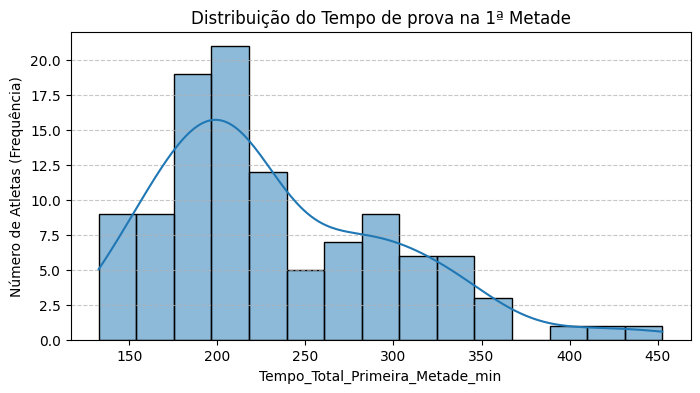

In [55]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df_final_completo, x="Tempo_Total_Primeira_Metade_min", kde=True, bins=15
)
plt.title("Distribui√ß√£o do Tempo de prova na 1¬™ Metade")
plt.ylabel("N√∫mero de Atletas (Frequ√™ncia)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<Axes: xlabel='Tempo_Total_Primeira_Metade_min', ylabel='Tempo_Final_min'>

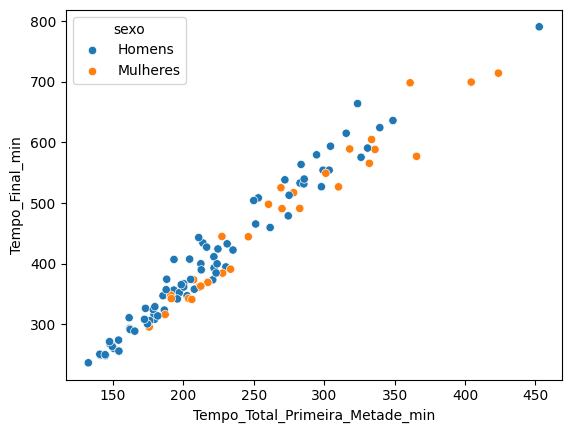

In [56]:
sns.scatterplot(
    data=df_final_completo,
    x="Tempo_Total_Primeira_Metade_min",
    y="Tempo_Final_min",
    hue="sexo",
)


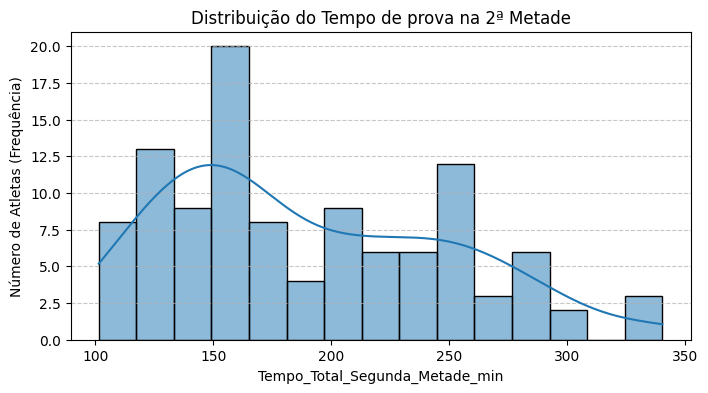

In [54]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df_final_completo, x="Tempo_Total_Segunda_Metade_min", kde=True, bins=15
)
plt.title("Distribui√ß√£o do Tempo de prova na 2¬™ Metade")
plt.ylabel("N√∫mero de Atletas (Frequ√™ncia)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<Axes: xlabel='Tempo_Total_Segunda_Metade_min', ylabel='Tempo_Final_min'>

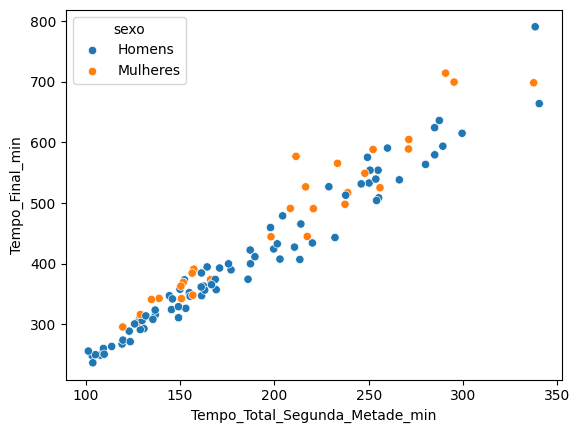

In [57]:
sns.scatterplot(
    data=df_final_completo,
    x="Tempo_Total_Segunda_Metade_min",
    y="Tempo_Final_min",
    hue="sexo",
)

#### An√°lise Subida vs Descida

In [60]:
df_sobe_desc = df_completo.copy()
df_sobe_desc["Diff_Sob_Desc"] = (
    df_sobe_desc["desnivel_positivo"] + df_sobe_desc["desnivel_negativo"]
)
df_sobe_desc.head()

Nome Atleta    sexo faixa_etaria           peso   ano  km_prova  \
0  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       1.0   
1  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       2.0   
2  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       3.0   
3  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       4.0   
4  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       5.0   

   tempo_por_km_seg  ano_mais_antigo  desnivel_positivo  desnivel_negativo  \
0               285             2023               13.0               -9.0   
1               298             2023               88.0                0.0   
2               295             2023               58.0                0.0   
3               363             2023               46.0              -81.0   
4               357             2023               41.0              -58.0   

   Diff_Sob_Desc  
0            4.0  
1           88.0  
2           58.0  
3          -35.0  
4          -17.0

In [61]:
def Sob_Desc(valor):
    if valor > 0:
        return "Subida"
    elif valor < 0:
        return "Descida"
    else:
        return "Plano"


# Aplicando a fun√ß√£o ao DataFrame
df_sobe_desc["Sob_Desc"] = df_sobe_desc["Diff_Sob_Desc"].apply(Sob_Desc)
df_sobe_desc.head()

Nome Atleta    sexo faixa_etaria           peso   ano  km_prova  \
0  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       1.0   
1  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       2.0   
2  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       3.0   
3  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       4.0   
4  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       5.0   

   tempo_por_km_seg  ano_mais_antigo  desnivel_positivo  desnivel_negativo  \
0               285             2023               13.0               -9.0   
1               298             2023               88.0                0.0   
2               295             2023               58.0                0.0   
3               363             2023               46.0              -81.0   
4               357             2023               41.0              -58.0   

   Diff_Sob_Desc Sob_Desc  
0            4.0   Subida  
1           88.0   Subida  
2           58.0   Subida  
3          -35.0  Descida  
4          -17.0  Descida